In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=140, centers=3, n_features=2, random_state=0, cluster_std=0.9)

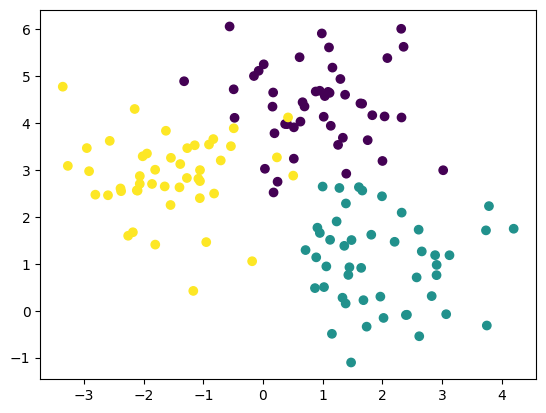

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
X, y = make_blobs(n_samples=140, centers=3, n_features=2, random_state=0, cluster_std=1.0)

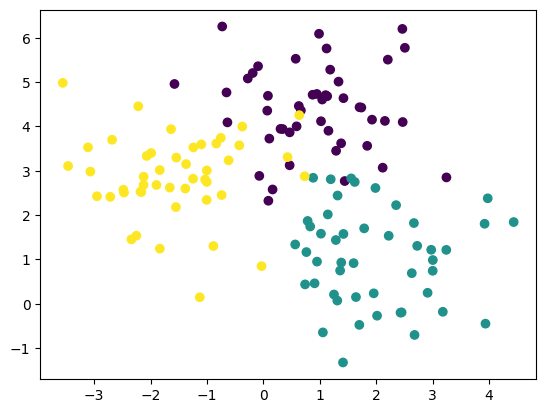

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
X, y = make_blobs(n_samples=140, centers=3, n_features=2, random_state=0, cluster_std=1.6)

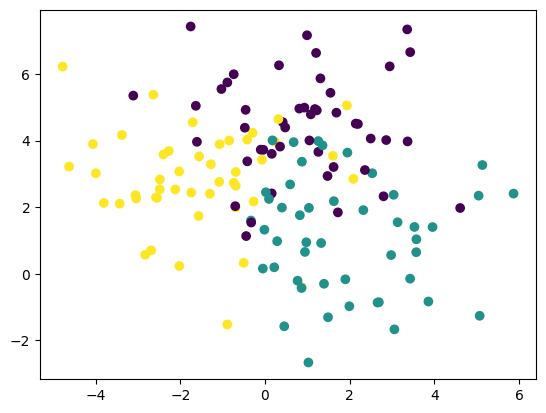

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
X, y = make_blobs(n_samples=140, centers=3, n_features=2, random_state=0, cluster_std=2.6)

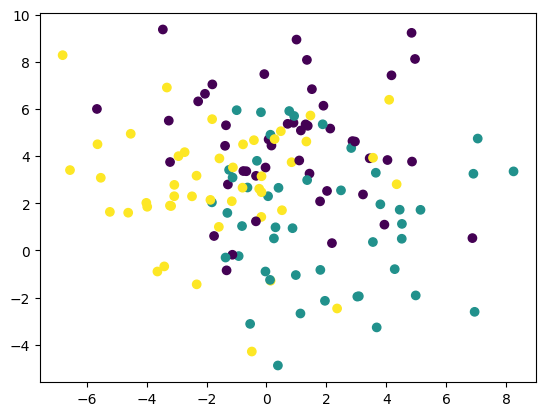

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Вывод: чем выше значение стандартное отклонение кластеров тем более перемешанными получаются объекты каждого класса и тем более сложно выполнять задачу классификации.

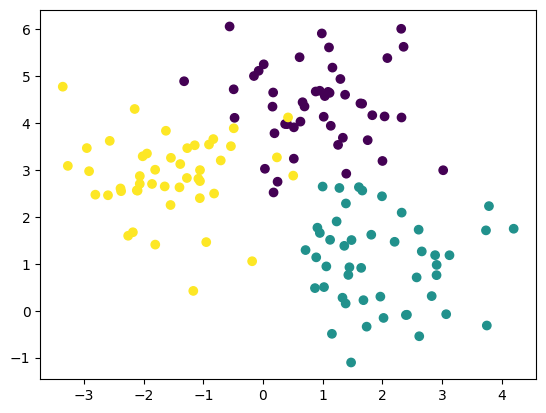

In [10]:
X, y = make_blobs(n_samples=140, centers=3, n_features=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
import math

def euclidean_distance(point1, point2):
    if len(point1) != len(point2):
      raise ValueError("Input vectors must have the same dimension.")

    squared_diffs = [(x - y) ** 2 for x, y in zip(point1, point2)]

    return math.sqrt(sum(squared_diffs))

In [12]:
def get_next_neighbor(element, X_local, y_local) -> tuple:
  """
    Returns y for nearest element to the given, updated martrix X and vector y.
  """

  distances = []
  for i in range(len(X)):
    distances.append(euclidean_distance(X[i], element))


  nearest_neighbor_index = distances.index(min(distances))
  nearest_neighbor = y[nearest_neighbor_index]



  X_local = np.delete(X, nearest_neighbor_index)
  y_local = np.delete(y, nearest_neighbor_index)

  return nearest_neighbor, X_local, y_local

In [13]:
from collections import Counter

def k_nearest(k, element, X, y) -> int:
  neighbors = []

  for _ in range(k):
    neighbor, X, y = get_next_neighbor(element, X, y)
    neighbors.append(neighbor)
  counter = Counter(neighbors)

  return max(counter, key=counter.get)

In [14]:
points = [[2, 5], [1, 5], [2, 6], [-1, 1], [-2, 4], [-1, 3], [1, 1], [2, 2], [2, 1], [0, 3], [1, 3]]

Point (2, 5) is classified as 0
Point (1, 5) is classified as 0
Point (2, 6) is classified as 0
Point (-1, 1) is classified as 2
Point (-2, 4) is classified as 2
Point (-1, 3) is classified as 2
Point (1, 1) is classified as 1
Point (2, 2) is classified as 1
Point (2, 1) is classified as 1
Point (0, 3) is classified as 0
Point (1, 3) is classified as 1


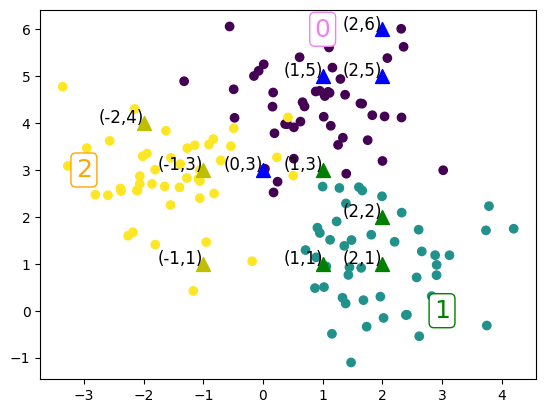

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y)
for i, (x, y_) in enumerate(points):
    group = k_nearest(3, (x, y_), X, y)
    color = ""
    if group == 0:
        print(f'\033[95mPoint {(x, y_)} is classified as {group}\033[0m')
        color = 'b'
    elif group == 1:
        print(f'\033[92mPoint {(x, y_)} is classified as {group}\033[0m')
        color = 'g'
    elif group == 2:
        print(f'\033[38;2;255;128;0mPoint {(x, y_)} is classified as {group}\033[0m')
        color = 'y'

    plt.scatter(x, y_, marker='^', color=color, s=100)
    plt.text(x, y_, f'({x},{y_})', fontsize=12, ha='right')


big_digits = [(1, 6, 0, 'violet'), (3, 0, 1, 'green'), (-3, 3, 2, 'orange')]

for x, y_, digit, color in big_digits:
    plt.text(x, y_, str(digit), fontsize=18, ha='center', va='center', color=color,
             bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.2'))



plt.show()